# &#x1F4D1; &nbsp; <span style="color:red"> Reflections. Artificial Intelligence for Robotics. Sections 4-7</span>

##   &#x1F916; &nbsp; <span style="color:red">Links</span>

Localization, Mapping, SLAM and The Kalman Filter according to George

https://www.cs.cmu.edu/~motionplanning/lecture/lec19_lastyear.pdf

Fitting Gaussian Process Models in Python https://blog.dominodatalab.com/fitting-gaussian-process-models-python/

An Introduction to the Kalman Filter http://www.cs.unc.edu/~welch/media/pdf/kalman_intro.pdf

Signal processing http://scipy-cookbook.readthedocs.io/items/idx_signal_processing.html

pykalman https://pykalman.github.io/

##   &#x1F916; &nbsp; <span style="color:red">Libraries</span>

In [90]:
from math import *
import os
import numpy as np
import pandas as pd
import random
import scipy.stats
import scipy.optimize
from time import time

In [3]:
from IPython.display import display, Image
import matplotlib.pylab as plt
import matplotlib.cm as cm
from matplotlib import offsetbox
%matplotlib inline

##   &#x1F916; &nbsp; <span style="color:red">Section 4. Kalman Filters</span>

### Notes

### Examples

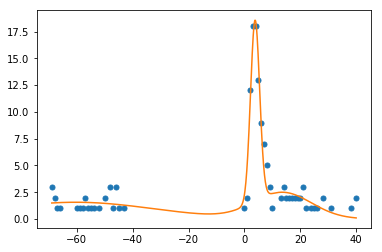

In [108]:
# Curve fitting with a sum of gaussians
data = np.array([-69, 3, -68, 2, -67, 1, -66, 1, -60, 1, -59, 1,
                 -58, 1, -57, 2, -56, 1, -55, 1, -54, 1, -52, 1,
                 -50, 2, -48, 3, -47, 1, -46, 3, -45, 1, -43, 1,
                 0, 1, 1, 2, 2, 12, 3, 18, 4, 18, 5, 13, 6, 9,
                 7, 7, 8, 5, 9, 3, 10, 1, 13, 2, 14, 3, 15, 2,
                 16, 2, 17, 2, 18, 2, 19, 2, 20, 2, 21, 3, 22, 1,
                 24, 1, 25, 1, 26, 1, 28, 2, 31, 1, 38, 1, 40, 2])
x, y = data.reshape(-1, 2).T

def tri_norm(x, *args):
    m1, m2, m3, s1, s2, s3, k1, k2, k3 = args
    ret = k1*scipy.stats.norm.pdf(x, loc=m1 ,scale=s1)
    ret += k2*scipy.stats.norm.pdf(x, loc=m2 ,scale=s2)
    ret += k3*scipy.stats.norm.pdf(x, loc=m3 ,scale=s3)
    return ret


params = [-50, 3, 20, 1, 1, 1, 1, 1, 1]

fitted_params,_ = scipy.optimize.curve_fit(tri_norm,x, y, p0=params)

plt.plot(x, y, 'o', ms=5)
xx = np.linspace(np.min(x), np.max(x), 1000)
plt.plot(xx, tri_norm(xx, *fitted_params))

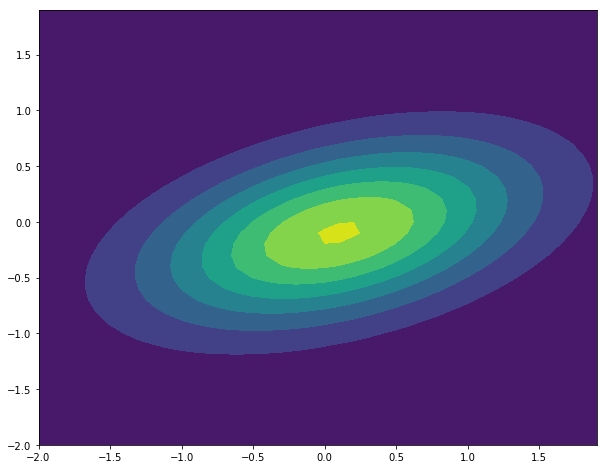

In [186]:
x, y = np.mgrid[-2:2:.1, -2:2:.1]
pos = np.dstack((x, y))
rv = scipy.stats.multivariate_normal([0.1, -0.1], [[0.8, 0.3], [0.2, 0.3]])
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, rv.pdf(pos))


[0, 0.01]

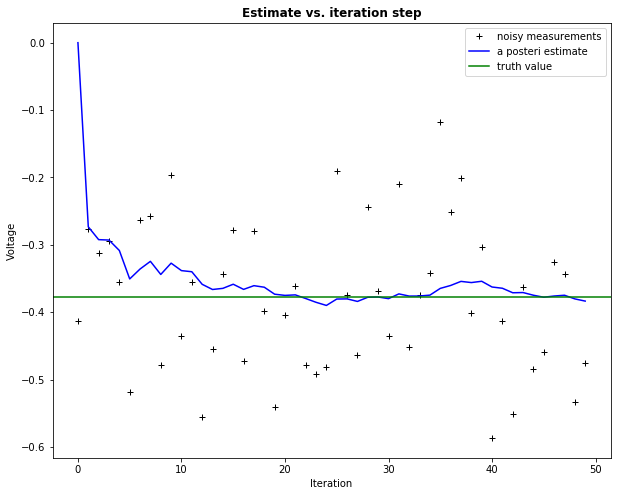

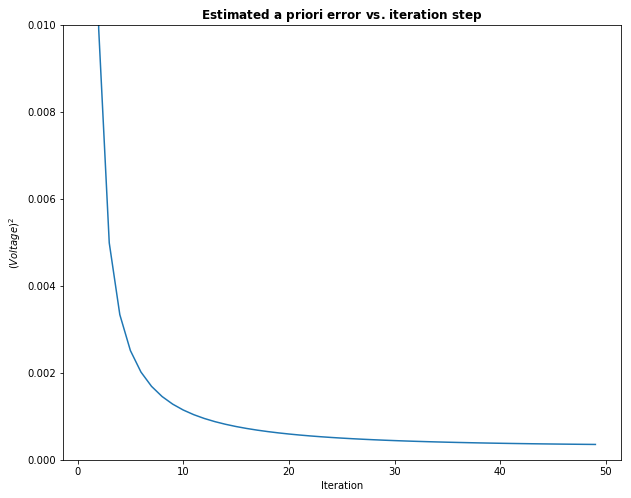

In [147]:
# Kalman filter example demo in Python

# A Python implementation of the example given in pages 11-15 of "An
# Introduction to the Kalman Filter" by Greg Welch and Gary Bishop,
# University of North Carolina at Chapel Hill, Department of Computer
# Science, TR 95-041,
# http://www.cs.unc.edu/~welch/kalman/kalmanIntro.html

# by Andrew D. Straw

plt.rcParams['figure.figsize'] = (10, 8)

# intial parameters
n_iter = 50
sz = (n_iter,) # size of array
x = -0.37727 # truth value (typo in example at top of p. 13 calls this z)
z = np.random.normal(x,0.1,size=sz) # observations (normal about x, sigma=0.1)

Q = 1e-5 # process variance

# allocate space for arrays
xhat=np.zeros(sz)      # a posteri estimate of x
P=np.zeros(sz)         # a posteri error estimate
xhatminus=np.zeros(sz) # a priori estimate of x
Pminus=np.zeros(sz)    # a priori error estimate
K=np.zeros(sz)         # gain or blending factor

R = 0.1**2 # estimate of measurement variance, change to see effect

# intial guesses
xhat[0] = 0.0
P[0] = 1.0

for k in range(1,n_iter):
    # time update
    xhatminus[k] = xhat[k-1]
    Pminus[k] = P[k-1]+Q

    # measurement update
    K[k] = Pminus[k]/( Pminus[k]+R )
    xhat[k] = xhatminus[k]+K[k]*(z[k]-xhatminus[k])
    P[k] = (1-K[k])*Pminus[k]

plt.figure()
plt.plot(z,'k+',label='noisy measurements')
plt.plot(xhat,'b-',label='a posteri estimate')
plt.axhline(x,color='g',label='truth value')
plt.legend()
plt.title('Estimate vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('Voltage')

plt.figure()
valid_iter = range(1,n_iter) # Pminus not valid at step 0
plt.plot(valid_iter,Pminus[valid_iter],label='a priori error estimate')
plt.title('Estimated $\it{\mathbf{a \ priori}}$ error vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('$(Voltage)^2$')
plt.setp(plt.gca(),'ylim',[0,.01])

### Quizes

In [1]:
# Quiz: Tracking Intro
# Next point on the line

In [45]:
# Quiz: Gaussian Intro
# Quiz: Variance Comparison
def gaussian(x, mu, sig):
    coef = 1/np.power(2*np.pi*np.power(sig,2), 0.5)
    return coef*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

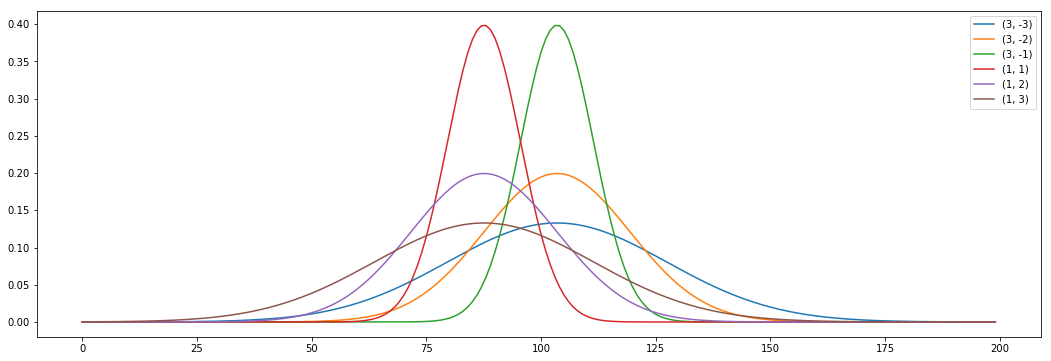

In [46]:
plt.figure(figsize=(18,6))
coefficients = [(3, -3), (3, -2), (3, -1), (1, 1), (1, 2), (1, 3)]
labels = ["(3, -3)", "(3, -2)", "(3, -1)", "(1, 1)", "(1, 2)", "(1, 3)"]
i=0
for mu, sig in coefficients:    
    plt.plot(gaussian(np.linspace(-10, 15, 200), mu, sig), label=labels[i])
    plt.legend()
    i+=1

In [47]:
# Quiz: Preferred Gaussian
# A narrow Gaussian, since that means we are confident about our location

In [48]:
# Quiz: Evaluate Gaussian
gaussian(8, 10, 2)

0.12098536225957168

In [63]:
# Quiz: Maximize Gaussian
#For this problem, you aren't writing any code.
#Instead, please just change the last argument 
#in f() to maximize the output.

from math import *

def f(mu, sigma2, x):
    return 1/sqrt(2.*pi*sigma2) * exp(-.5*(x-mu)**2 / sigma2)

print (f(10.,4.,10)) #Change the 8. to something else!
# mu == x

0.19947114020071635


In [66]:
# Quiz: Measurement And Motion 1
# measurement - product; motion - convolution

Bayes' theorem $ P(A \mid B) = \frac{P(B \mid A) \, P(A)}{P(B)} $

*Quiz: Measurement And Motion 2*
- measurement: updating our belief and renormalizing the distribution (Bayes Rule) 
- motion: keeping track of where all of the probability "went" when we moved (Total Probability)

*Quiz: Shifting The Mean*
The new belief will be somewhere between the previous belief and the new measurement.

*Quiz: Predicting The Peak* The new belief will be more certain than either the previous belief OR the measurement.

In [73]:
# Quiz: Parameter Update
mu1, nu1, sig1, r1 = 10, 12, 2, 2
mu2 = (nu1*sig1**2 + mu1*r1**2)/(sig1**2 + r1**2)
mu2

11.0

In [75]:
sig2 = sqrt(1/(1/sig1**2 + 1/r1**2))
sig2**2

2.0000000000000004

In [78]:
mu3, nu3, sig3, r3 = 10, 13, sqrt(8), sqrt(2)
mu4 = (nu3*sig3**2 + mu3*r3**2)/(sig3**2 + r3**2)
mu4

12.4

In [79]:
sig4 = sqrt(1/(1/sig3**2 + 1/r3**2))
sig4**2

1.6

*Quiz: Separated Gaussians* The Gaussian's have the same width (which means same certainty), their product will be a Gaussian with a mean that is right in the middle.

*Quiz: Separated Gaussians 2* Multiple measurements ALWAYS gives us a more certain

In [112]:
# Quiz: New Mean And Variance
# Write a program to update your mean and variance
# when given the mean and variance of your belief
# and the mean and variance of your measurement.
# This program will update the parameters of your
# belief function.

def update(mean1, var1, mean2, var2):
    new_mean = (mean1*var2 + mean2*var1)/(var1 + var2)
    new_var = 1/(1/var1 + 1/var2)
    return [new_mean, new_var]

print (update(10., 8., 13., 2.))

[12.4, 1.6]


In [113]:
# Quiz: Gaussian Motion
# 18, 10

In [115]:
# Quiz: Predict Function
# Write a program that will predict your new mean
# and variance given the mean and variance of your 
# prior belief and the mean and variance of your 
# motion. 

def update(mean1, var1, mean2, var2):
    new_mean = (var2 * mean1 + var1 * mean2) / (var1 + var2)
    new_var = 1/(1/var1 + 1/var2)
    return [new_mean, new_var]

def predict(mean1, var1, mean2, var2):
    new_mean = mean1 + mean2
    new_var = var1 + var2
    return [new_mean, new_var]

print (predict(10., 4., 12., 4.))

[22.0, 8.0]


In [119]:
# Quiz: Kalman Filter Code
# Write a program that will iteratively update and
# predict based on the location measurements 
# and inferred motions shown below. 

def update(mean1, var1, mean2, var2):
    new_mean = float(var2 * mean1 + var1 * mean2) / (var1 + var2)
    new_var = 1./(1./var1 + 1./var2)
    return [new_mean, new_var]

def predict(mean1, var1, mean2, var2):
    new_mean = mean1 + mean2
    new_var = var1 + var2
    return [new_mean, new_var]

measurements = [5., 6., 7., 9., 10.]
motion = [1., 1., 2., 1., 1.]
measurement_sig = 4.
motion_sig = 2.
mu = 0.
sig = 10000.

#Please print out ONLY the final values of the mean
#and the variance in a list [mu, sig]. 
for i in range(len(measurements)):
        [mu, sig] = update(mu, sig, measurements[i], measurement_sig)
        [mu, sig] = predict(mu, sig, motion[i], motion_sig)
# Insert code here
print ([mu, sig])

[10.999906177177365, 4.005861580844194]


In [120]:
# Quiz: Kalman Prediction
# We'd expect the car to continue in a straight line.

In [143]:
# Quiz: Kalman Filter Land
# x = 2 ; velocity = 1

In [144]:
# Quiz: Another Prediction
# x = 3 ; velocity = 2

In [157]:
# Quiz: Kalman Matrices
# Write a function 'kalman_filter' that implements a multi-
# dimensional Kalman Filter for the example given

class matrix:
    
    # implements basic operations of a matrix class
    
    def __init__(self, value):
        self.value = value
        self.dimx = len(value)
        self.dimy = len(value[0])
        if value == [[]]:
            self.dimx = 0
    
    def zero(self, dimx, dimy):
        # check if valid dimensions
        if dimx < 1 or dimy < 1:
            raise (ValueError, "Invalid size of matrix")
        else:
            self.dimx = dimx
            self.dimy = dimy
            self.value = [[0 for row in range(dimy)] for col in range(dimx)]
    
    def identity(self, dim):
        # check if valid dimension
        if dim < 1:
            raise (ValueError, "Invalid size of matrix")
        else:
            self.dimx = dim
            self.dimy = dim
            self.value = [[0 for row in range(dim)] for col in range(dim)]
            for i in range(dim):
                self.value[i][i] = 1
    
    def show(self):
        for i in range(self.dimx):
            print (self.value[i])
        print (' ')
    
    def __add__(self, other):
        # check if correct dimensions
        if self.dimx != other.dimx or self.dimy != other.dimy:
            raise (ValueError, "Matrices must be of equal dimensions to add")
        else:
            # add if correct dimensions
            res = matrix([[]])
            res.zero(self.dimx, self.dimy)
            for i in range(self.dimx):
                for j in range(self.dimy):
                    res.value[i][j] = self.value[i][j] + other.value[i][j]
            return res
    
    def __sub__(self, other):
        # check if correct dimensions
        if self.dimx != other.dimx or self.dimy != other.dimy:
            raise (ValueError, "Matrices must be of equal dimensions to subtract")
        else:
            # subtract if correct dimensions
            res = matrix([[]])
            res.zero(self.dimx, self.dimy)
            for i in range(self.dimx):
                for j in range(self.dimy):
                    res.value[i][j] = self.value[i][j] - other.value[i][j]
            return res
    
    def __mul__(self, other):
        # check if correct dimensions
        if self.dimy != other.dimx:
            raise (ValueError, "Matrices must be m*n and n*p to multiply")
        else:
            # subtract if correct dimensions
            res = matrix([[]])
            res.zero(self.dimx, other.dimy)
            for i in range(self.dimx):
                for j in range(other.dimy):
                    for k in range(self.dimy):
                        res.value[i][j] += self.value[i][k] * other.value[k][j]
            return res
    
    def transpose(self):
        # compute transpose
        res = matrix([[]])
        res.zero(self.dimy, self.dimx)
        for i in range(self.dimx):
            for j in range(self.dimy):
                res.value[j][i] = self.value[i][j]
        return res
    
    # Thanks to Ernesto P. Adorio for use of Cholesky and CholeskyInverse functions
    
    def Cholesky(self, ztol=1.0e-5):
        # Computes the upper triangular Cholesky factorization of
        # a positive definite matrix.
        res = matrix([[]])
        res.zero(self.dimx, self.dimx)
        
        for i in range(self.dimx):
            S = sum([(res.value[k][i])**2 for k in range(i)])
            d = self.value[i][i] - S
            if abs(d) < ztol:
                res.value[i][i] = 0.0
            else:
                if d < 0.0:
                    raise (ValueError, "Matrix not positive-definite")
                res.value[i][i] = sqrt(d)
            for j in range(i+1, self.dimx):
                S = sum([res.value[k][i] * res.value[k][j] for k in range(self.dimx)])
                if abs(S) < ztol:
                    S = 0.0
                res.value[i][j] = (self.value[i][j] - S)/res.value[i][i]
        return res
    
    def CholeskyInverse(self):
        # Computes inverse of matrix given its Cholesky upper Triangular
        # decomposition of matrix.
        res = matrix([[]])
        res.zero(self.dimx, self.dimx)
        
        # Backward step for inverse.
        for j in reversed(range(self.dimx)):
            tjj = self.value[j][j]
            S = sum([self.value[j][k]*res.value[j][k] for k in range(j+1, self.dimx)])
            res.value[j][j] = 1.0/tjj**2 - S/tjj
            for i in reversed(range(j)):
                res.value[j][i] = res.value[i][j] = \
                -sum([self.value[i][k]*res.value[k][j] for k in range(i+1, self.dimx)])/self.value[i][i]
        return res
    
    def inverse(self):
        aux = self.Cholesky()
        res = aux.CholeskyInverse()
        return res
    
    def __repr__(self):
        return repr(self.value)


In [171]:
########################################

# Implement the filter function below

def kalman_filter(x, P):
    for n in range(len(measurements)):
        
        y = matrix([[measurements[n]]])  - (H * x)
        
        K = P * H.transpose() * (H * P * H.transpose() + R).inverse()
        
        x = x + (K * y)
        
        P = ( I - K * H) * P

        x = F * x + u
        
        P = F * P * F.transpose()
        
    return x,P

############################################
### use the code below to test your filter!
############################################

In [172]:
measurements = [1, 2, 3]

x = matrix([[0.], [0.]]) # initial state (location and velocity)
P = matrix([[1000., 0.], [0., 1000.]]) # initial uncertainty
u = matrix([[0.], [0.]]) # external motion
F = matrix([[1., 1.], [0, 1.]]) # next state function
H = matrix([[1., 0.]]) # measurement function
R = matrix([[1.]]) # measurement uncertainty
I = matrix([[1., 0.], [0., 1.]]) # identity matrix

print (kalman_filter(x, P))
# output should be:
# x: [[3.9996664447958645], [0.9999998335552873]]
# P: [[2.3318904241194827, 0.9991676099921091], [0.9991676099921067, 0.49950058263974184]]

([[3.9996664447958645], [0.9999998335552873]], [[2.3318904241194827, 0.9991676099921091], [0.9991676099921067, 0.49950058263974184]])


##   &#x1F916; &nbsp; <span style="color:red">Lesson 5. Problem Set 2</span>

In [174]:
# Quiz: Measurement Update
# smaller

In [177]:
print (update(10., 7., 10., 7.))

[10.0, 3.5]


In [179]:
# Quiz: New Variance
# 0.5

In [178]:
# Quiz: Heavytail Gaussian
# No

In [187]:
# Quiz: How Many Dimensions
# 4 (x1, y1, x2, y2) or (x, dx, y, dy)

In [189]:
# Quiz: State Transition Matrix
# 1   0  0.1  0
# 0   1   0  0.1
# 0   0   1   0
# 0   0   0   1

In [197]:
# Quiz: Programming Exercise

# Fill in the matrices P, F, H, R and I at the bottom
#
# This question requires NO CODING, just fill in the 
# matrices where indicated. Please do not delete or modify
# any provided code OR comments. Good luck!


class matrix:
    
    # implements basic operations of a matrix class
    
    def __init__(self, value):
        self.value = value
        self.dimx = len(value)
        self.dimy = len(value[0])
        if value == [[]]:
            self.dimx = 0
    
    def zero(self, dimx, dimy):
        # check if valid dimensions
        if dimx < 1 or dimy < 1:
            raise (ValueError, "Invalid size of matrix")
        else:
            self.dimx = dimx
            self.dimy = dimy
            self.value = [[0 for row in range(dimy)] for col in range(dimx)]
    
    def identity(self, dim):
        # check if valid dimension
        if dim < 1:
            raise (ValueError, "Invalid size of matrix")
        else:
            self.dimx = dim
            self.dimy = dim
            self.value = [[0 for row in range(dim)] for col in range(dim)]
            for i in range(dim):
                self.value[i][i] = 1
    
    def show(self):
        for i in range(self.dimx):
            print (self.value[i])
        print (' ')
    
    def __add__(self, other):
        # check if correct dimensions
        if self.dimx != other.dimx or self.dimy != other.dimy:
            raise (ValueError, "Matrices must be of equal dimensions to add")
        else:
            # add if correct dimensions
            res = matrix([[]])
            res.zero(self.dimx, self.dimy)
            for i in range(self.dimx):
                for j in range(self.dimy):
                    res.value[i][j] = self.value[i][j] + other.value[i][j]
            return res
    
    def __sub__(self, other):
        # check if correct dimensions
        if self.dimx != other.dimx or self.dimy != other.dimy:
            raise (ValueError, "Matrices must be of equal dimensions to subtract")
        else:
            # subtract if correct dimensions
            res = matrix([[]])
            res.zero(self.dimx, self.dimy)
            for i in range(self.dimx):
                for j in range(self.dimy):
                    res.value[i][j] = self.value[i][j] - other.value[i][j]
            return res
    
    def __mul__(self, other):
        # check if correct dimensions
        if self.dimy != other.dimx:
            raise (ValueError, "Matrices must be m*n and n*p to multiply")
        else:
            # subtract if correct dimensions
            res = matrix([[]])
            res.zero(self.dimx, other.dimy)
            for i in range(self.dimx):
                for j in range(other.dimy):
                    for k in range(self.dimy):
                        res.value[i][j] += self.value[i][k] * other.value[k][j]
            return res
    
    def transpose(self):
        # compute transpose
        res = matrix([[]])
        res.zero(self.dimy, self.dimx)
        for i in range(self.dimx):
            for j in range(self.dimy):
                res.value[j][i] = self.value[i][j]
        return res
    
    # Thanks to Ernesto P. Adorio for use of Cholesky and CholeskyInverse functions
    
    def Cholesky(self, ztol=1.0e-5):
        # Computes the upper triangular Cholesky factorization of
        # a positive definite matrix.
        res = matrix([[]])
        res.zero(self.dimx, self.dimx)
        
        for i in range(self.dimx):
            S = sum([(res.value[k][i])**2 for k in range(i)])
            d = self.value[i][i] - S
            if abs(d) < ztol:
                res.value[i][i] = 0.0
            else:
                if d < 0.0:
                    raise (ValueError, "Matrix not positive-definite")
                res.value[i][i] = sqrt(d)
            for j in range(i+1, self.dimx):
                S = sum([res.value[k][i] * res.value[k][j] for k in range(self.dimx)])
                if abs(S) < ztol:
                    S = 0.0
                res.value[i][j] = (self.value[i][j] - S)/res.value[i][i]
        return res
    
    def CholeskyInverse(self):
        # Computes inverse of matrix given its Cholesky upper Triangular
        # decomposition of matrix.
        res = matrix([[]])
        res.zero(self.dimx, self.dimx)
        
        # Backward step for inverse.
        for j in reversed(range(self.dimx)):
            tjj = self.value[j][j]
            S = sum([self.value[j][k]*res.value[j][k] for k in range(j+1, self.dimx)])
            res.value[j][j] = 1.0/tjj**2 - S/tjj
            for i in reversed(range(j)):
                res.value[j][i] = res.value[i][j] = -sum([self.value[i][k]*res.value[k][j] for k in range(i+1, self.dimx)])/self.value[i][i]
        return res
    
    def inverse(self):
        aux = self.Cholesky()
        res = aux.CholeskyInverse()
        return res
    
    def __repr__(self):
        return repr(self.value)


########################################

def filter(x, P):
    for n in range(len(measurements)):
        
        # prediction
        x = (F * x) + u
        P = F * P * F.transpose()
        
        # measurement update
        Z = matrix([measurements[n]])
        y = Z.transpose() - (H * x)
        S = H * P * H.transpose() + R
        K = P * H.transpose() * S.inverse()
        x = x + (K * y)
        P = (I - (K * H)) * P
    
    print ('x= ')
    x.show()
    print ('P= ')
    P.show()

########################################

print ("### 4-dimensional example ###")

measurements = [[5., 10.], [6., 8.], [7., 6.], [8., 4.], [9., 2.], [10., 0.]]
initial_xy = [4., 12.]

# measurements = [[1., 4.], [6., 0.], [11., -4.], [16., -8.]]
# initial_xy = [-4., 8.]

# measurements = [[1., 17.], [1., 15.], [1., 13.], [1., 11.]]
# initial_xy = [1., 19.]

dt = 0.1

x = matrix([[initial_xy[0]], [initial_xy[1]], [0.], [0.]]) # initial state (location and velocity)
u = matrix([[0.], [0.], [0.], [0.]]) # external motion

#### DO NOT MODIFY ANYTHING ABOVE HERE ####
#### fill this in, remember to use the matrix() function!: ####

P =  matrix([[0., 0., 0., 0.], [0., 0., 0., 0.], [0., 0., 1000., 0.], [0., 0., 0., 1000.]]) 
# initial uncertainty: 0 for positions x and y, 1000 for the two velocities
F =  matrix([[1., 0., 0.1, 0.], [0., 1., 0., 0.1], [0., 0., 1., 0.], [0., 0., 0., 1.]]) 
# next state function: generalize the 2d version to 4d
H =  matrix([[1., 0., 0., 0.], [0., 1., 0., 0.]]) 
# measurement function: reflect the fact that we observe x and y but not the two velocities
R =  matrix([[0.1, 0.], [0., 0.1]]) 
# measurement uncertainty: use 2x2 matrix with 0.1 as main diagonal
I =  matrix([[1., 0., 0., 0.], [0., 1., 0., 0.], [0., 0., 1., 0.], [0., 0., 0., 1.]]) 
# 4d identity matrix

###### DO NOT MODIFY ANYTHING HERE #######

filter(x, P)

### 4-dimensional example ###
x= 
[9.999340731787717]
[0.001318536424568617]
[9.998901219646193]
[-19.997802439292386]
 
P= 
[0.03955609273706198, 0.0, 0.06592682122843721, 0.0]
[0.0, 0.03955609273706198, 0.0, 0.06592682122843721]
[0.06592682122843718, 0.0, 0.10987803538073201, 0.0]
[0.0, 0.06592682122843718, 0.0, 0.10987803538073201]
 


In [198]:
measurements = [[1., 4.], [6., 0.], [11., -4.], [16., -8.]]
initial_xy = [-4., 8.]
x = matrix([[initial_xy[0]], [initial_xy[1]], [0.], [0.]]) # initial state (location and velocity)
filter(x, P)

x= 
[15.993335554815062]
[-7.99466844385205]
[49.98333888703765]
[-39.98667110963012]
 
P= 
[0.05331556147950691, 0.0, 0.13328890369876803, 0.0]
[0.0, 0.05331556147950691, 0.0, 0.13328890369876803]
[0.1332889036987679, 0.0, 0.33322225924692717, 0.0]
[0.0, 0.1332889036987679, 0.0, 0.33322225924692717]
 


##   &#x1F916; &nbsp; <span style="color:red">Lesson 6. Problem Set 2 Help</span>

##   &#x1F916; &nbsp; <span style="color:red">Lesson 7. Office Hours Week 2</span>